# Generating Airfoils for XFoil

I have packaged each airfoil considered for this study into Python classes that will produce a list of points for the camber line based on an input camber, chord length, and number of points desired. We will use those procedures in this section to generate a pseudo-thin airfoil suitable for testing using *XFoil*.

The airfoil shape we will use is not as thin as those we typically use on indoor models. *XFoil* does not like that kind of airfoil. Instead, we will generate an airfoil of some specified thickness and add a round nose at the leading edge, and a short parabolic curve that does not quite close off the trailing edge. Again, *XFoil* works better if we do not generate a sharp point at the trailing edge. These design choices are based on work by Michael Reid{cite}`reed2006` in his Master's Thesis who used *XFoil* to study thin airfoils with reflexed trailing edges. 

As a check of the basic camber line mechanism, we will draw a simplex airfoil as an example:

In [2]:
import mmtime_helper

In [3]:
from mmtime.Airfoil import Airfoil

In [4]:
chord = 3
camber = 5
thickness = 1
npoints = 26
airfoil = Airfoil('simplex', chord, camber, thickness, npoints)

generating simplex camberline
0.1356120828799594 7.328714650373645
2.985 5 0.015 26


In [5]:
xc,yc = airfoil.get_camber_line()

generating simplex camberline
0.1356120828799594 7.328714650373645
2.985 5 0.015 26


In [6]:
xc

array([0.015     , 0.03005053, 0.06437488, 0.11253488, 0.17220608,
       0.24195874, 0.32079011, 0.40794353, 0.50282031, 0.60493071,
       0.71386399, 0.82926899, 0.95084081, 1.07831139, 1.21144255,
       1.35002077, 1.49385318, 1.64276443, 1.79659412, 1.95519483,
       2.1184304 , 2.2861746 , 2.45830995, 2.63472675, 2.81532226,
       3.        ])

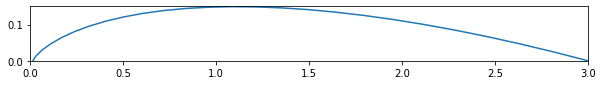

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
plt.xlim(0, chord)
plt.ylim(0, camber/100 * chord)
plt.plot(xc,yc)
plt.show()


In [8]:
dydx = airfoil.get_camber_slopes()

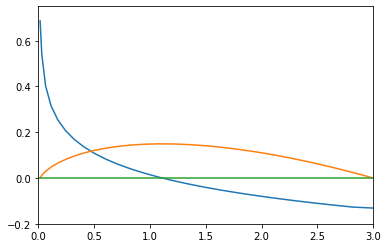

In [9]:
plt.xlim(0, chord)
plt.ylim(-.2, 0.75)
plt.plot(xc[:npoints],dydx)
plt.plot(xc,yc)
plt.plot([0,chord],[0,0])
plt.show()

In [10]:
xule, yule, xlle, ylle = airfoil.get_le()

0.014999999967594548 -9.922687073409828e-12 4 11 15


In [11]:
xu,yu,xl,yl = airfoil.get_surface()


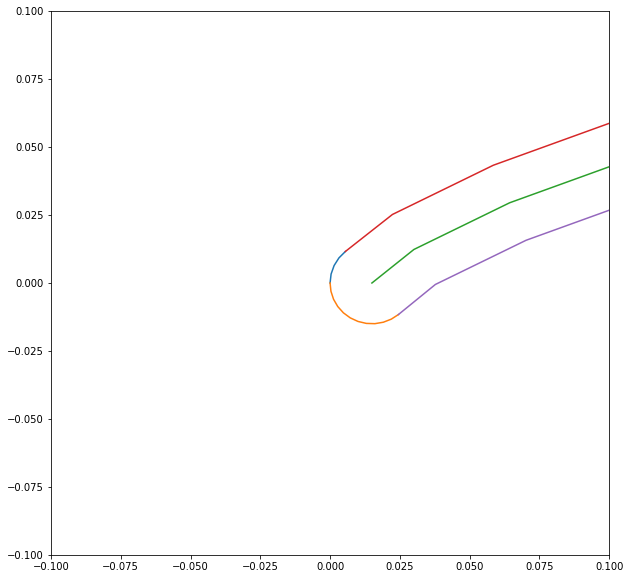

In [12]:
plt.figure(figsize=(10,10))
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.plot(xc,yc)
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

In [13]:
xute,yute,xlte,ylte = airfoil.get_te()

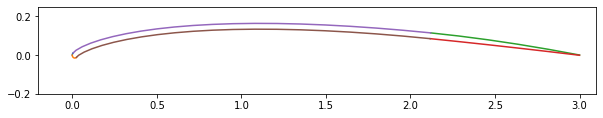

In [14]:
plt.figure(figsize=(10,1.6))
plt.xlim(-0.2, chord+0.1)
plt.ylim(-0.2, camber/100 * chord + 0.1)
#plt.plot(xc,yc)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.plot(xute,yute)
plt.plot(xlte,ylte)
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

In [15]:
xpath = '/Users/rblack/_dev/nffs-symposium/live-2022/mmtime/airfoil'
airfoil.xfoil_data_file(xpath)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/rblack/_dev/nffs-symposium/live-2022/.direnv/python-3.10.2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/t9/hc5s57h95tj3rsp4qvk61m8m0000gn/T/ipykernel_27427/750632555.py", line 2, in <module>
    airfoil.xfoil_data_file(xpath)
  File "/Users/rblack/_dev/nffs-symposium/live-2022/mmtime/Airfoil.py", line 149, in xfoil_data_file
    dpath = os.path.join(xpath,dname)
NameError: name 'dname' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rblack/_dev/nffs-symposium/live-2022/.direnv/python-3.10.2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another

TypeError: object of type 'NoneType' has no len()